<a href="https://colab.research.google.com/github/RomanKundriukov/ki/blob/main/MachineLearningMitPython_ipunb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modell Celsius zu Fahrenheit

In [17]:
#!pip install openpyxl

# Import

In [37]:
import tensorflow as tf
import numpy as np
import logging
import os
import pandas as pd
import matplotlib.pyplot as plt

# initialisieren logger


In [2]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Trainings Daten


In [142]:
# mein
tabelle_pfad="./TrainingsData/C&F.xlsx"

df = pd.read_excel(tabelle_pfad)

celcius_q = np.array(df['C'], dtype=float)
fahrenheit_a = np.array(df['F'], dtype=float)

celcius_q_train = celcius_q[:200]
fahrenheit_a_train = fahrenheit_a[:200]

# Testdaten (Labels - ab Index 200)
celcius_q_label = celcius_q[200:]
fahrenheit_a_label = fahrenheit_a[200:]


# Erstellen ein Modell (Dense Layer)

In [143]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=[1]),  # Verborgene Schicht
    tf.keras.layers.Dense(8, activation='relu'),                   # Weitere verborgene Schicht
    tf.keras.layers.Dense(1)                                       # Ausgabeschicht
])

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Kleinere Lernrate
    loss='mean_squared_error',  # Verlustfunktion
    metrics=['mae']             # Mittlerer absoluter Fehler als zusätzliche Metrik
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

# Training des Modells

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 142.6036 - mae: 10.1406 - val_loss: 3243.7114 - val_mae: 53.1949
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 116.0887 - mae: 8.8483 - val_loss: 1842.5979 - val_mae: 39.0164
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 110.8997 - mae: 8.8878 - val_loss: 2329.2695 - val_mae: 44.9694
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 101.4047 - mae: 8.3210 - val_loss: 1837.0757 - val_mae: 39.7719
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 89.4029 - mae: 7.7183 - val_loss: 1479.2115 - val_mae: 34.7878
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 82.6550 - mae: 7.5683 - val_loss: 1270.8057 - val_mae: 31.9728
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 74.9057 - mae: 7.1565 - val_loss: 1201.1650 - val_mae: 30.8980
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 60.0499 - mae: 6.5494 - val_loss: 1256.0985 - val_mae: 31.7507
Epoch 9/100
7/7 ━━━━━━━━━━━

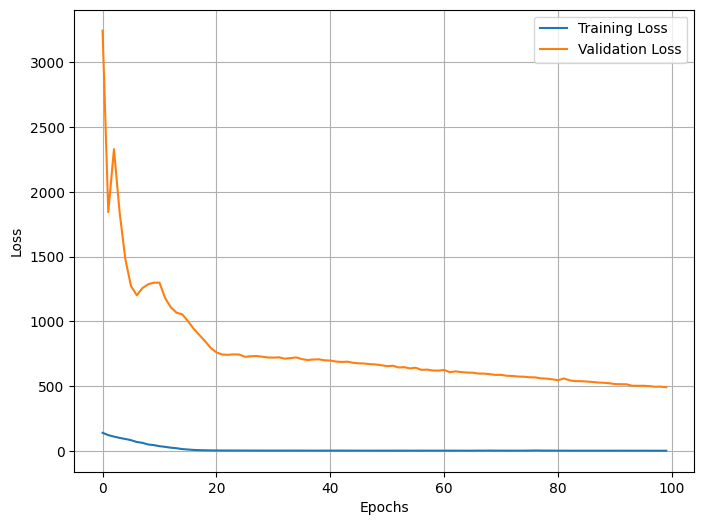

Test Loss: 490.8371276855469, Test MAE: 18.585233688354492


In [149]:
#Mein
# Callbacks konfigurieren
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./Modells/C&F.keras',  # Speicherort des besten Modells
        save_best_only=True,            # Speichert nur das beste Modell
        monitor='val_loss',             # Überwache den Validierungsverlust
        mode='min'                      # Minimierung des Loss
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',             # Überwache den Validierungsverlust
        patience=5,                    # Stoppt, wenn sich der Verlust 10 Epochen nicht verbessert
        restore_best_weights=True       # Stellt die besten Gewichte wieder her
    )
]

history = model.fit(
    celcius_q_train, fahrenheit_a_train,
    validation_data=(celcius_q_label, fahrenheit_a_label),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

loss, mae = model.evaluate(celcius_q_label, fahrenheit_a_label, verbose=0)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Test des Modells


In [150]:
print(model.predict(np.array([100.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[211.92256]]


# Weights des Modells


In [151]:
print("These are the layer variables: {}".format(model.get_weights()))

These are the layer variables: [array([[ 0.25087255,  0.396131  ,  0.33358377,  0.33403268, -0.6660076 ,
        -0.21489336,  0.81684744, -0.87227136, -0.74717474,  0.61589783,
        -0.26829645, -0.8166537 , -0.37956548, -0.41285184, -0.21902555,
         0.14103374]], dtype=float32), array([-0.08816948,  0.90246356, -1.6379851 ,  2.2676206 , -1.4107361 ,
       -2.8880992 ,  1.5359539 , -0.51668453, -0.9436712 ,  1.5995816 ,
       -1.6095556 , -0.46879837, -2.552438  , -0.9876296 , -1.2241307 ,
        1.8961551 ], dtype=float32), array([[ 4.98775512e-01, -3.32548678e-01,  1.90350369e-01,
         2.31506824e-01, -6.56823441e-02, -5.49546719e-01,
         1.52884617e-01, -1.18980482e-01],
       [ 7.33196557e-01,  5.97036667e-02, -7.97561884e-01,
         1.35009646e-01,  2.98263997e-01, -3.64046484e-01,
        -9.98097435e-02,  1.66937590e-01],
       [-8.47688556e-01,  4.32766706e-01, -6.10448793e-03,
        -7.34254181e-01, -2.37279281e-01, -3.76504779e-01,
        -5.859037